<a href="https://colab.research.google.com/github/Yogesh-ProITBridge/Time-series-Project/blob/main/ARIMA%26XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Time Series/gold_data.csv")

In [ ]:
df

,Date,Gold Price
0,31-08-2008,1190
1,30-08-2008,1188
2,29-08-2008,1186
3,30-09-2008,1350
4,29-09-2008,1317
...,...,...
5649,05-05-2024,7068
5650,04-05-2024,7068
5651,03-05-2024,7039
5652,02-05-2024,7069


In [ ]:
df.isnull().sum()

Date          0
Gold Price    0
dtype: int64

In [ ]:
df.dtypes

Date          object
Gold Price     int64
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
df.rename(columns={'Gold Price':'Gold_Price'}, inplace = True)

In [ ]:
df

,Date,Gold_Price,Year,Month,Day
0,2008-08-31,1190,2008,8,31
1,2008-08-30,1188,2008,8,30
2,2008-08-29,1186,2008,8,29
3,2008-09-30,1350,2008,9,30
4,2008-09-29,1317,2008,9,29
...,...,...,...,...,...
5649,2024-05-05,7068,2024,5,5
5650,2024-05-04,7068,2024,5,4
5651,2024-05-03,7039,2024,5,3
5652,2024-05-02,7069,2024,5,2


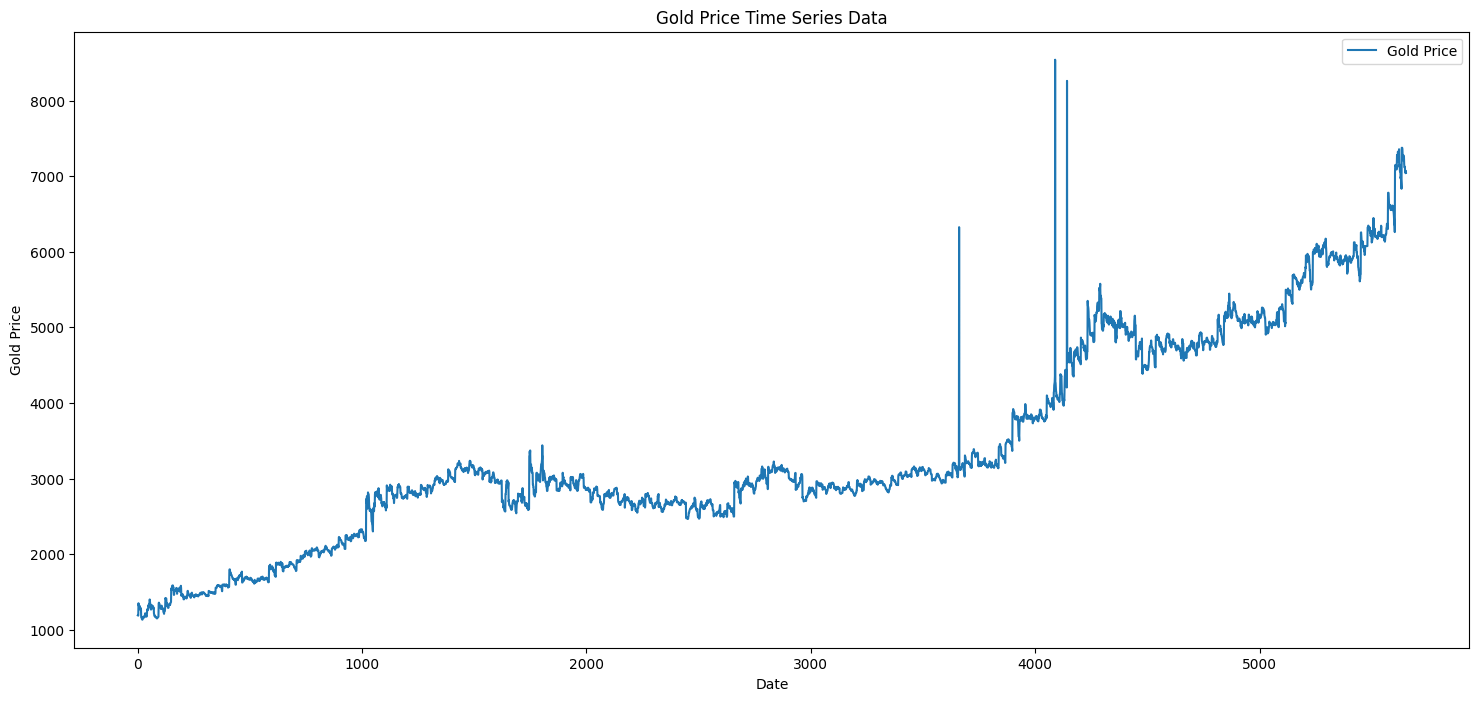

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.plot(df.index, df['Gold_Price'], label='Gold Price')
plt.title('Gold Price Time Series Data')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [ ]:
df.dtypes

Date          datetime64[ns]
Gold_Price             int64
Year                   int32
Month                  int32
Day                    int32
dtype: object

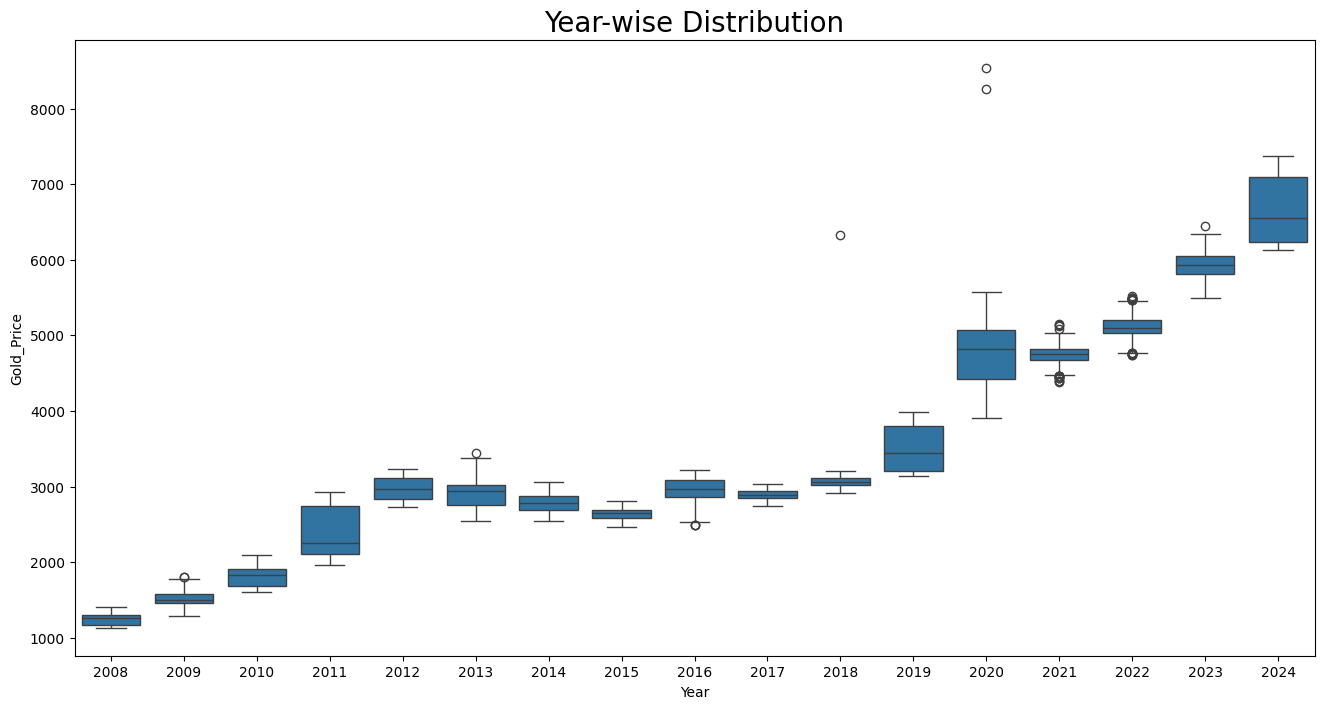

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,8))
sns.boxplot(x='Year',y='Gold_Price',data = df)
plt.title('Year-wise Distribution',size = 20)
plt.show()

In [ ]:
mean_price = df['Gold_Price'].mean()
variance_price = df['Gold_Price'].var()

print(f"Mean: {mean_price}")
print(f"Variance: {variance_price}")


Mean: 3382.593385214008
Variance: 1793941.6702976488


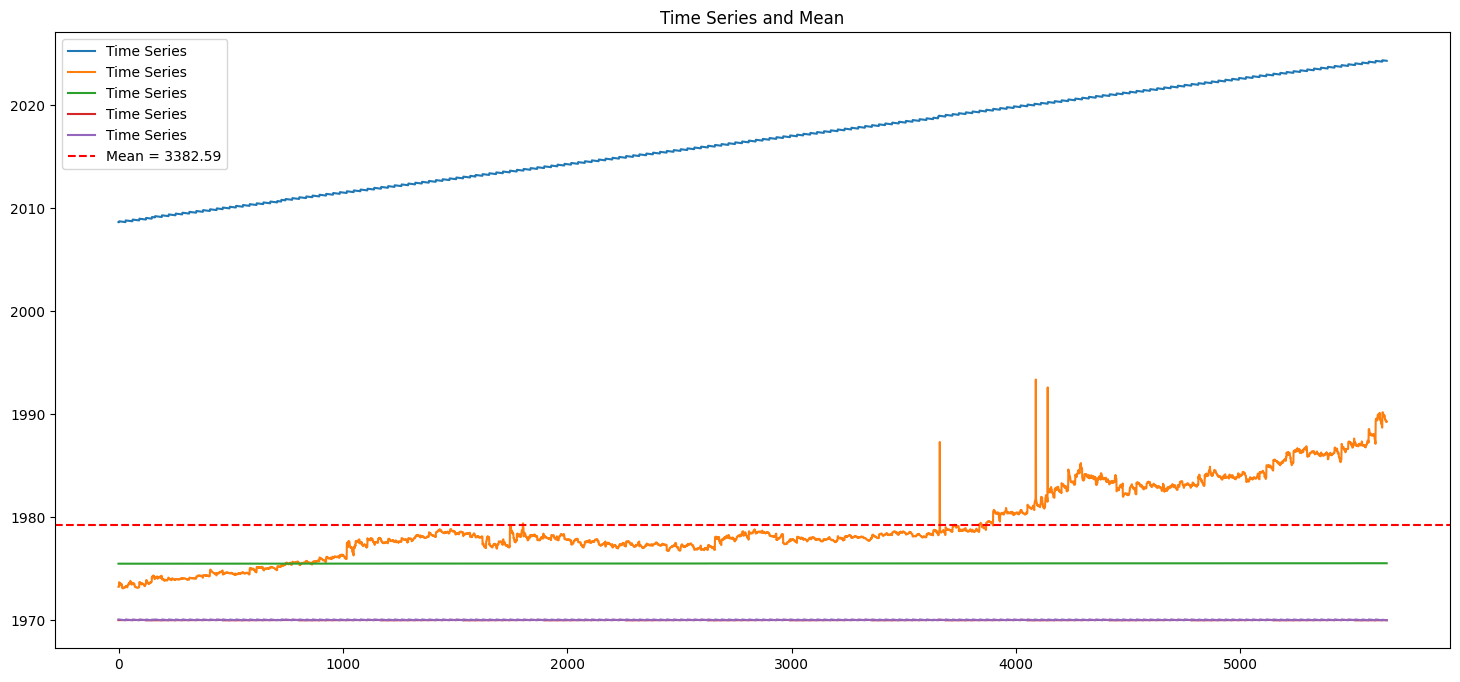

In [ ]:
# Plot the time series with the mean annotation
plt.figure(figsize=(18, 8))
plt.plot(df, label='Time Series')
plt.axhline(mean_price, color='red', linestyle='--', label=f'Mean = {mean_price:.2f}')
plt.title('Time Series and Mean')
plt.legend()
plt.show()

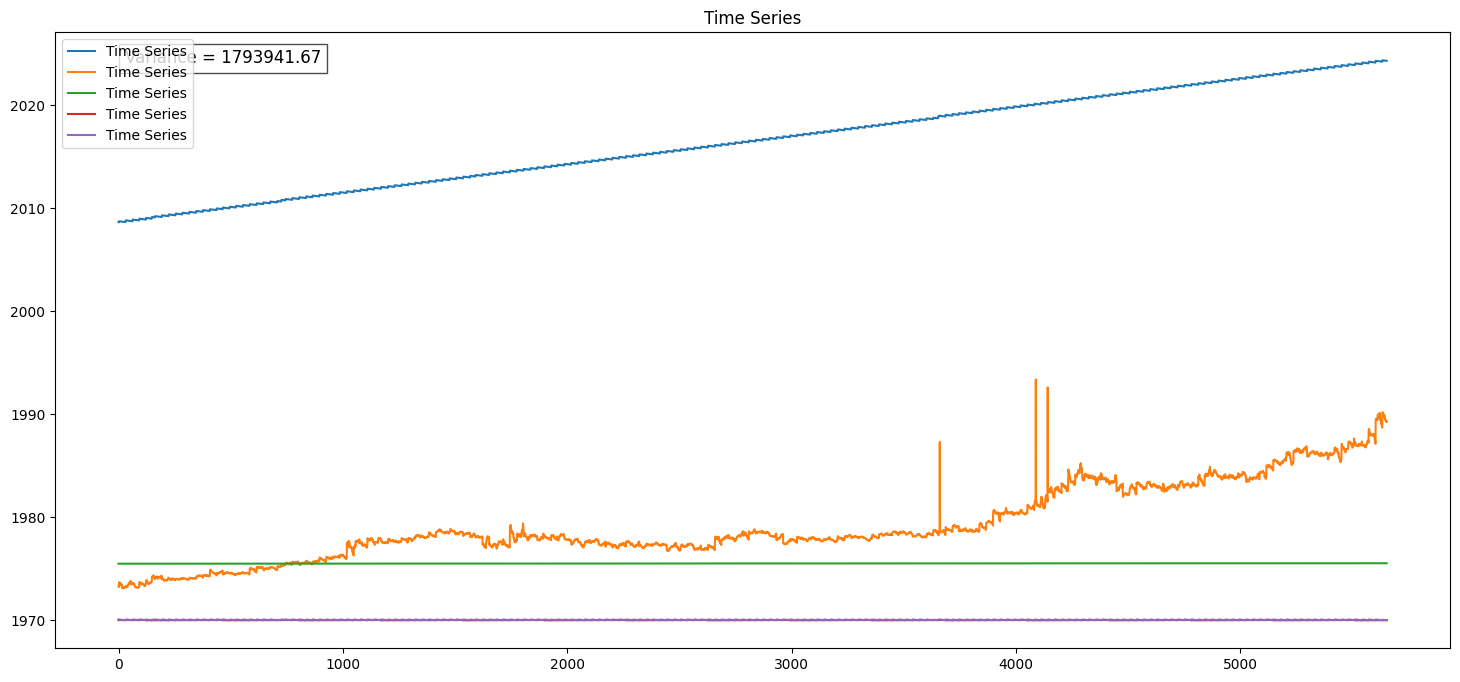

In [ ]:
# Plot the time series with the variance annotation
plt.figure(figsize=(18, 8))
plt.plot(df, label='Time Series')
plt.title('Time Series')
plt.annotate(f'Variance = {variance_price:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.legend()
plt.show()

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
import statsmodels.tsa.stattools as smt

def check_stationarity(series):
    result = smt.adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    stationary = True
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        if result[0]>=value:
            print("variable is not stationary")
            stationary=False
    if stationary:
        print("variable is stationary")

check_stationarity(df['Gold_Price'])

ADF Statistic: 1.653954
p-value: 0.998011
Critical Values:
	1%: -3.432
variable is not stationary
	5%: -2.862
variable is not stationary
	10%: -2.567
variable is not stationary


In [ ]:
df['Gold_diff'] = df['Gold_Price'].diff()
df = df.dropna()
df['Gold_diff'].describe()

count    5653.000000
mean        1.036087
std       131.553940
min     -4270.000000
25%       -10.000000
50%         0.000000
75%         8.000000
max      4187.000000
Name: Gold_diff, dtype: float64

In [ ]:
check_stationarity(df['Gold_diff'].iloc[1:])

ADF Statistic: -18.142755
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
variable is stationary


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

gold_prices = df['Gold_diff'].values

# Calculate autocorrelation
autocorr = sm.tsa.acf(gold_prices, nlags=4)

print(autocorr)


[ 1.         -0.44734404  0.0055646  -0.00746668  0.00631795]


<ipython-input-22-f667a36c8afb>:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(autocorr)), autocorr, use_line_collection=True)


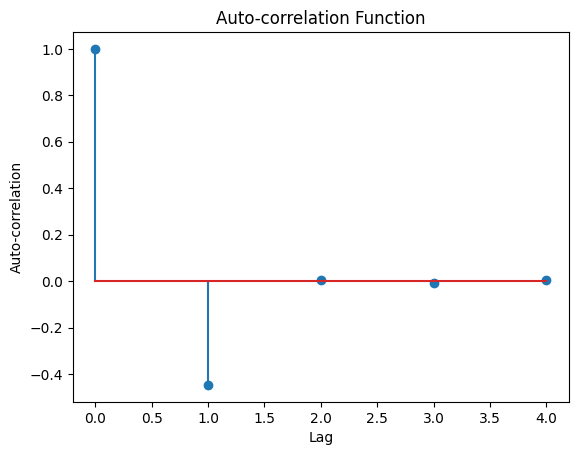

In [ ]:
# Plot the auto-correlation function
plt.stem(range(len(autocorr)), autocorr, use_line_collection=True)
plt.title('Auto-correlation Function')
plt.xlabel('Lag')
plt.ylabel('Auto-correlation')
plt.show()

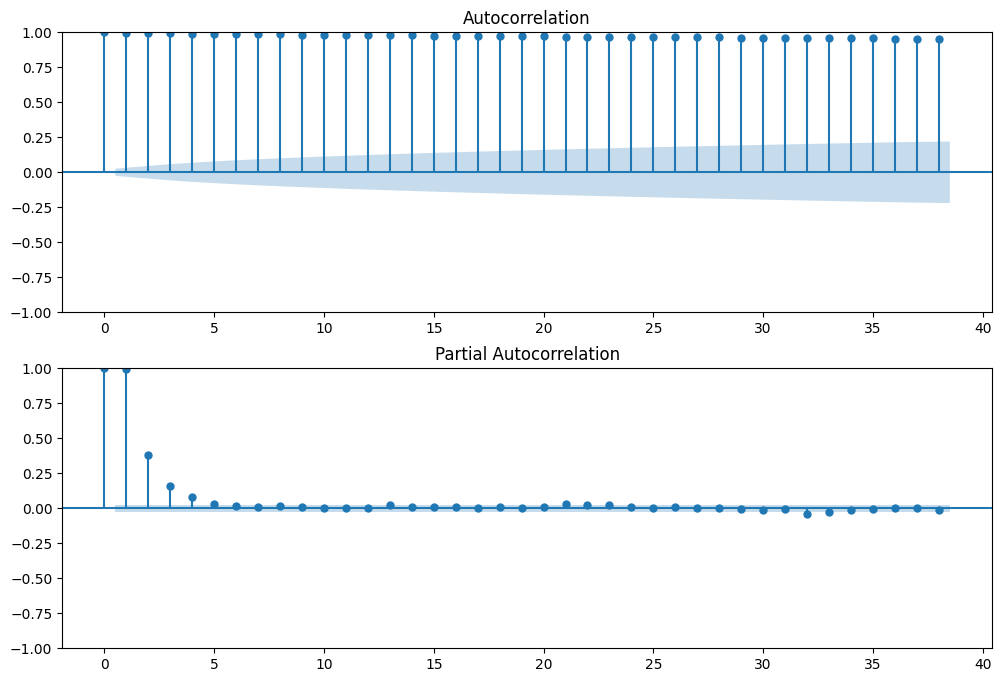

In [ ]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,8))
plt.subplot(211)
plot_acf(df['Gold_Price'].iloc[1:], ax=plt.gca())
plt.subplot(212)
plot_pacf(df['Gold_Price'].iloc[1:], ax=plt.gca())
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = df['Gold_Price']

# Fit ARIMA model
model = ARIMA(data, order=(3,0,1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


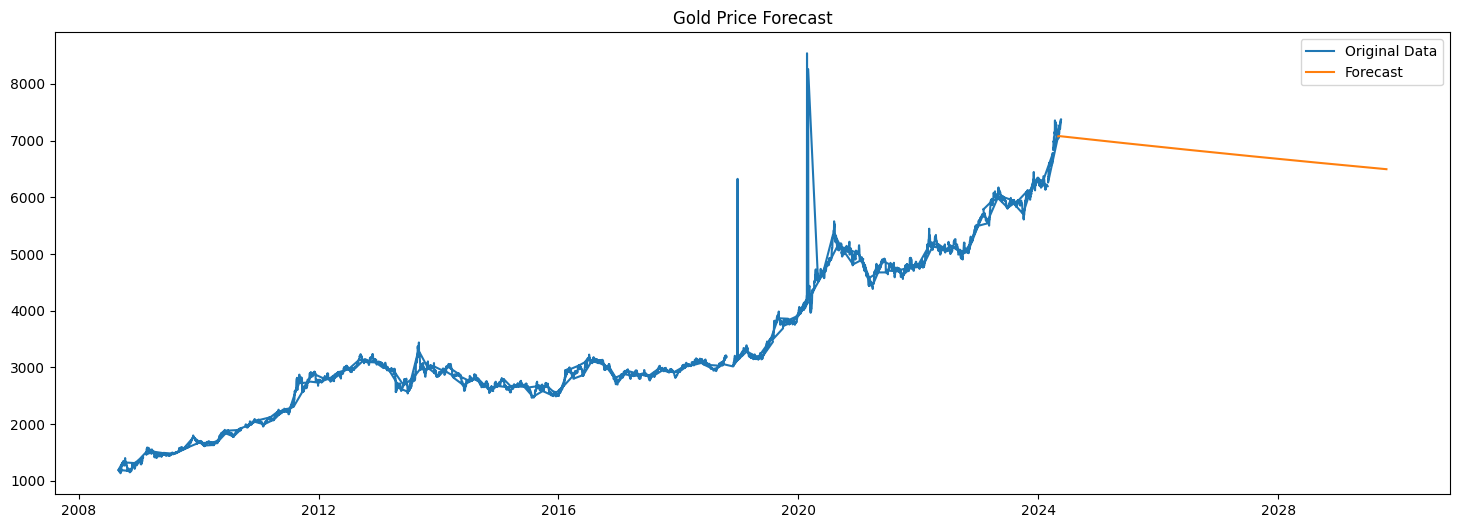

In [ ]:
# Make predictions
forecast_steps = 2000
forecast = model_fit.forecast(steps=forecast_steps)

# Plot original data and forecast
plt.figure(figsize=(18, 6))
plt.plot(data.index, data, label="Original Data")
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label="Forecast")
plt.title("Gold Price Forecast")
plt.legend()
plt.show()

**XGBoost Regressor**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
x = df[['Year','Month','Day']]
y = df['Gold_Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:

    xg_reg = xgb.XGBRegressor(objective='reg:squarederror')


    param_grid = {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'n_estimators': [100, 200, 300]
    }


    grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid,
                               cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}
Best Score: -9695.046035741438


In [ ]:
 best_xg_reg = grid_search.best_estimator_

In [ ]:
preds = best_xg_reg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, preds)
print(f"Mean Squared Error: {mse}")

# Calculate the Accuracy
accuracy = 1 - (mse / y_test.var())
print("Accuracy:", accuracy)

Mean Squared Error: 16967.04041076397
Accuracy: 0.9907514700269691


In [ ]:
def predict_gold_price(date_str, model):
    date = pd.to_datetime(date_str)
    year = date.year
    month = date.month
    day = date.day
    input_features = pd.DataFrame({'Year': [year], 'Month': [month], 'Day': [day]})
    predicted_price = model.predict(input_features)
    return predicted_price[0]

date_to_predict = '2024-05-29'
predicted_price = predict_gold_price(date_to_predict, best_xg_reg)
print(f"Predicted Gold Price for {date_to_predict}: {predicted_price}")

Predicted Gold Price for 2024-05-29: 7206.1845703125


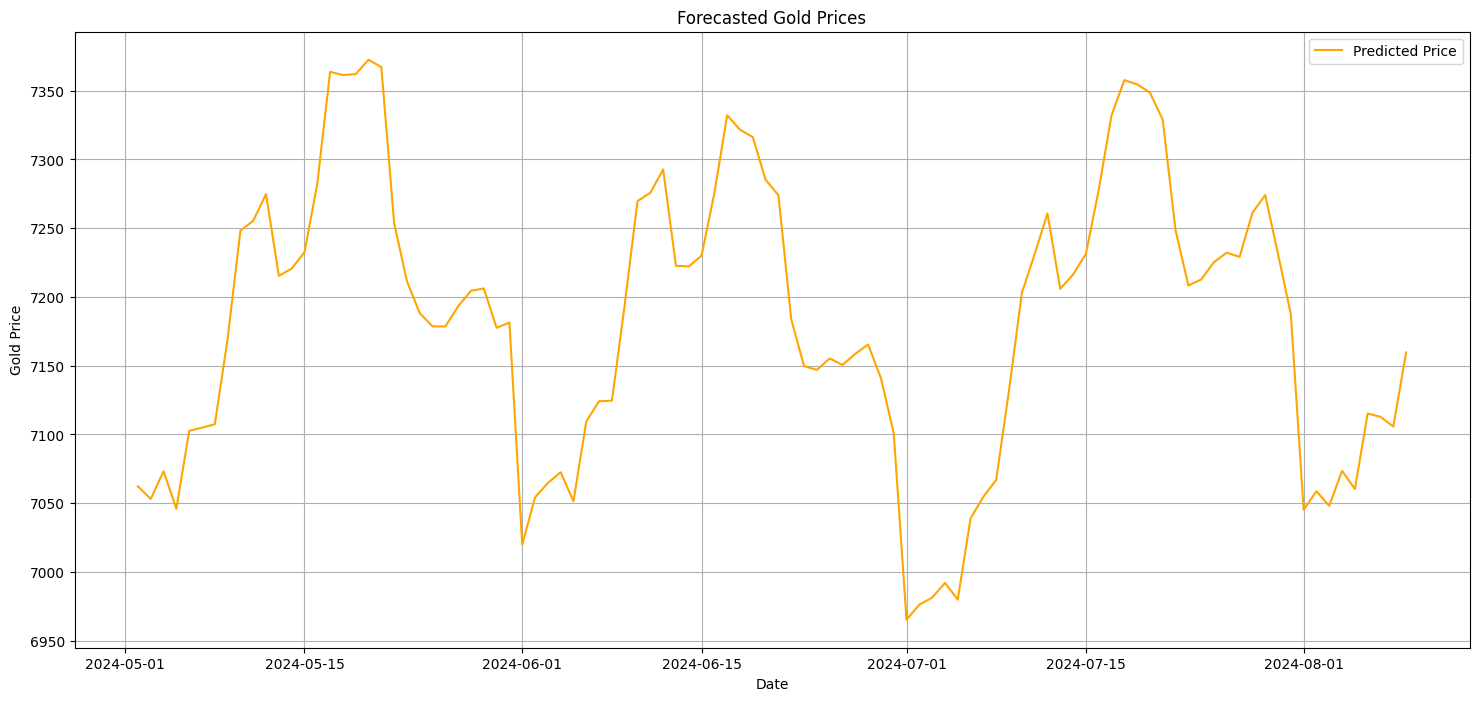

In [ ]:
def predict_gold_prices(model, start_date, steps):
    # Initialize an empty DataFrame to store the predicted prices
    forecast = pd.DataFrame(columns=['Date', 'Predicted_Price'])

    # Convert start_date to datetime
    start_date = pd.to_datetime(start_date)

    # Loop through the number of steps and make predictions for each step
    for i in range(1, steps+1):
        # Calculate the date for the current step
        current_date = start_date + pd.DateOffset(days=i)

        # Extract features from the current date
        year = current_date.year
        month = current_date.month
        day = current_date.day

        # Create input features DataFrame for prediction
        input_features = pd.DataFrame({'Year': [year], 'Month': [month], 'Day': [day]})

        # Predict the gold price for the current date
        predicted_price = model.predict(input_features)

        # Append the predicted price to the forecast DataFrame
        forecast = pd.concat([forecast, pd.DataFrame({'Date': [current_date], 'Predicted_Price': predicted_price})], ignore_index=True)

    return forecast

start_date = '2024-05-01'

forecast_steps = 100

forecast = predict_gold_prices(best_xg_reg, start_date, forecast_steps)

plt.figure(figsize=(18, 8))
plt.plot(forecast['Date'], forecast['Predicted_Price'], label='Predicted Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Forecasted Gold Prices')
plt.grid(True)
plt.legend()
plt.show()
